<a href="https://colab.research.google.com/github/Valentina3147/ValentinaLopez/blob/main/clases/Copia_de_Entregable_TallerRedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Taller Bosques Aleatorios

Usando el dataset heart.csv desarrollar un sistema de predicción que permita determinar si un paciente tiene una enfermedad cardíaca.

El data set tiene las siguientes variables independientes:

* age (edad)
* sex (sexo)
* chest pain type (tipo de dolor en el pecho)
* resting blood pressure (presión arterial en reposo)
* serum cholestoral in mg/dl (colesterol)
* fasting blood sugar > 120 mg/dl (nivel de azucar en sangre en ayunas)
* resting electrocardiographic results (values 0,1,2) (electrocardiograma en reposo)
* maximum heart rate achieved (frecuencia cardíaca máxima)
* exercise induced angina (angina provocada por ejercicio)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment (depresión del ST inducida por el ejercicio respecto al reposo)
* number of major vessels (0-3) colored by flourosopy (número de vasos principales coloreados)
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (talasemia detectada)

La variable dependiente o target es:

* Enfermedad cardíaca (valor = 0 NO, valor = 1 SI)

Realizar el ajuste del modelo, usando el 80% de los datos en el entrenamiento y el 20% para test, además obtener el accuracy general del sistema de predicción.

Guarde el modelo con extensión .h5

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [5]:

dfdata = pd.read_csv("heart.csv")


dfdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
dfdata.target.unique()

array([0, 1])

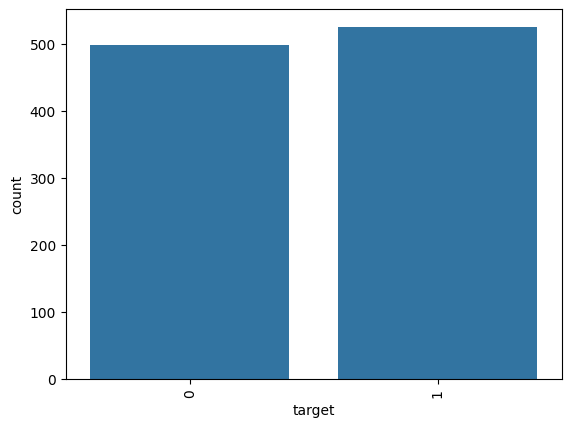

In [8]:
sns.countplot(x='target',data=dfdata)
plt.xticks(x=dfdata['target'],rotation='vertical')
plt.show()

In [9]:
dfdata[dfdata['target']==2].count()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:

from sklearn.model_selection import train_test_split
X = dfdata.drop('target', axis=1)
Y = dfdata['target']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
##regresion

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=50000)


In [20]:
##regresion
logistic.fit(xtrain,ytrain)

LogisticRegression(max_iter=50000)

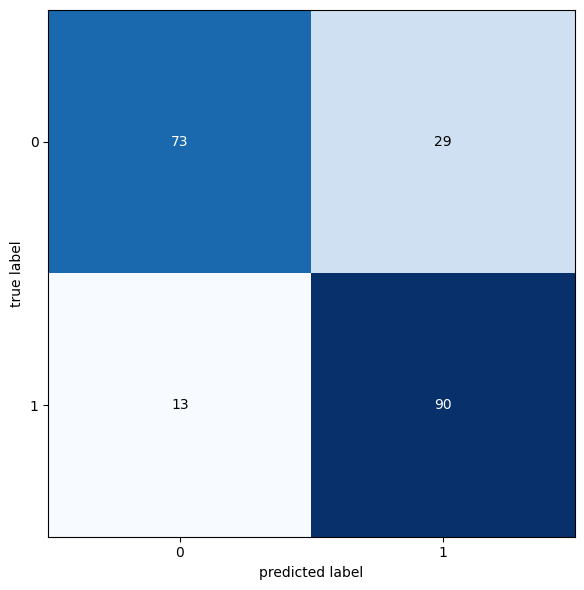

In [21]:
##regresion


from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
ypred=logistic.predict(xtest)
matriz = confusion_matrix(ytest, ypred)

plot_confusion_matrix(conf_mat=matriz,figsize=(6,6),show_normed=False)
plt.tight_layout()

In [22]:
# ARBOL DE DECISION

from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=19,random_state=45,min_samples_leaf=8)

RF_model.fit(xtrain,ytrain)

RandomForestClassifier(min_samples_leaf=8, n_estimators=19, random_state=45)

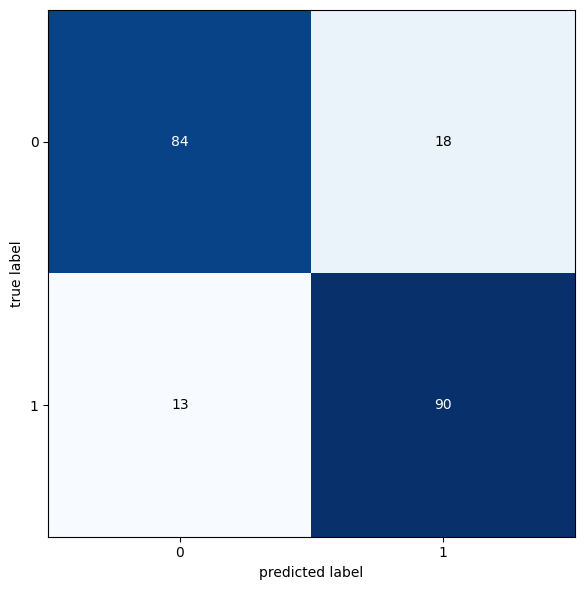

In [23]:
# ARBOL DE DECISION
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
ypred=RF_model.predict(xtest)
matriz = confusion_matrix(ytest, ypred)

plot_confusion_matrix(conf_mat=matriz,figsize=(6,6),show_normed=False)
plt.tight_layout()

In [24]:
# MAQUINAS DE SOPORTE VECTORIAL

from sklearn.svm import SVC

svc_model = SVC(kernel='linear',verbose= True)

svc_model.fit(xtrain,ytrain)

[LibSVM]

SVC(kernel='linear', verbose=True)

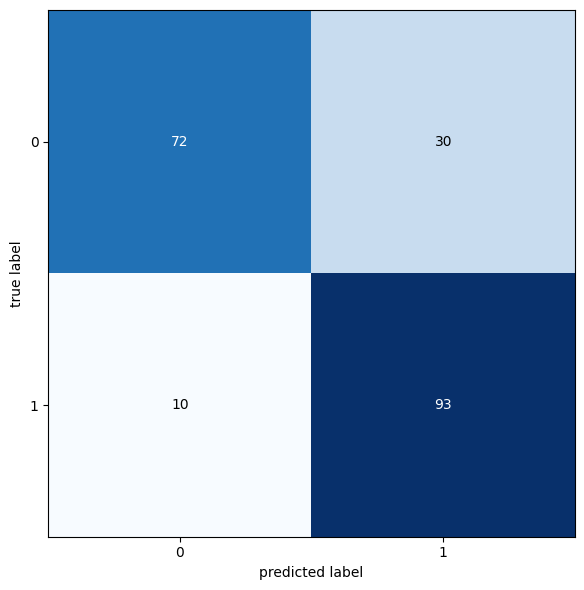

In [25]:
# MAQUINAS DE SOPORTE VECTORIAL
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
ypred=svc_model.predict(xtest)
matriz = confusion_matrix(ytest, ypred)

plot_confusion_matrix(conf_mat=matriz,figsize=(6,6),show_normed=False)
plt.tight_layout()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.asarray(ytrain).reshape(-1,1))

y_train = enc.transform(np.asarray(ytrain).reshape(-1,1)).toarray()
y_test = enc.transform(np.asarray(ytest).reshape(-1,1)).toarray()

In [ ]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(16,input_shape=(xtrain.shape[1],),activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))


model.add(Dense(2,activation='softmax'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 70,370 (274.88 KB)

 Trainable params: 70,370 (274.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain,y_train,epochs=100,batch_size=32,verbose=1,validation_split=0.1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 341ms/step - accuracy: 0.4937 - loss: 0.9222 - val_accuracy: 0.5000 - val_loss: 0.6900
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5018 - loss: 0.7462 - val_accuracy: 0.5000 - val_loss: 0.6989
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5079 - loss: 0.7338 - val_accuracy: 0.5000 - val_loss: 0.6966
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5248 - loss: 0.7114 - val_accuracy: 0.5000 - val_loss: 0.7063
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5093 - loss: 0.7095 - val_accuracy: 0.5122 - val_loss: 0.6907
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5332 - loss: 0.6963 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4963 - loss: 0.7042 - val_accuracy: 0.5000 - val_loss: 0.6981
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5444 - loss: 0.6901 - val_accuracy: 0.5000 

In [ ]:
model.save('Taller.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('Taller.h5')

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 70,372 (274.89 KB)

 Trainable params: 70,370 (274.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

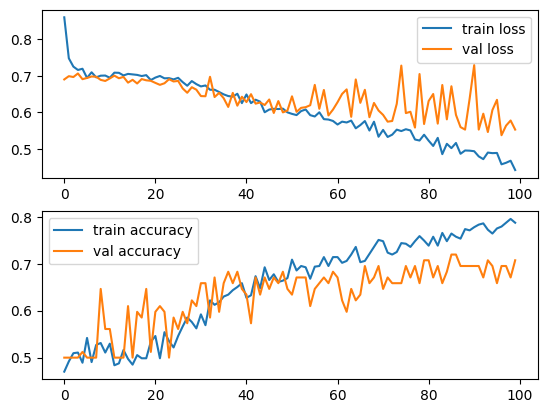

In [ ]:
plt.subplot (2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','val loss'])


plt.subplot (2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy','val accuracy'])


In [ ]:
print(xtest.shape)
print(ytest.shape)



(205, 13)
(205,)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64
              precision    recall  f1-score   support

           0     0.8000    0.6275    0.7033       102
           1     0.6960    0.8447    0.7632       103

    accuracy                         0.7366       205
   macro avg     0.7480    0.7361    0.7332       205
weighted avg     0.7477    0.7366    0.7334       205



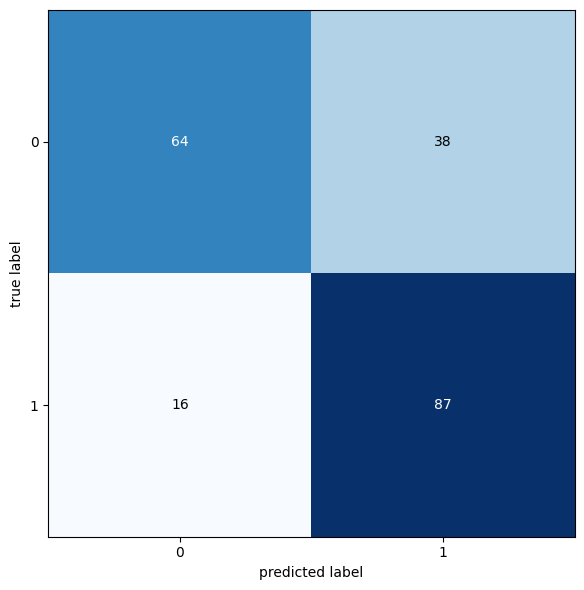

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

ypred = model.predict(xtest)
print(ytest)
matriz = confusion_matrix(ytest, np.argmax(ypred,axis=1))

plot_confusion_matrix(conf_mat=matriz,figsize=(6,6),show_normed=False)
plt.tight_layout()

print(metrics.classification_report(ytest,np.argmax(ypred,axis=1),digits=4))